In [1]:
%matplotlib inline

In [2]:
from pylab import imshow
import cv2
import numpy as np
import torch
import albumentations as albu
import os
import matplotlib.pyplot as plt

In [3]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 2.1 MB 23.5 MB/s 


In [4]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [5]:
!pip install cloths_segmentation  > /dev/null

In [6]:
from cloths_segmentation.pre_trained_models import create_model

In [7]:
model = create_model("Unet_2020-10-30")

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip


  0%|          | 0.00/47.0M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:647: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [8]:
model.eval();

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!pip install patool
import patoolib
patoolib.extract_archive("./drive/MyDrive/d1.rar", outdir="./")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached patool-1.12-py2.py3-none-any.whl (77 kB)
patool: Extracting ./drive/MyDrive/d1.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/d1.rar
patool:     with cwd='./'
patool: ... ./drive/MyDrive/d1.rar extracted to `./'.


'./'

In [12]:
def get_all_image(folder):
    paths = sorted(os.listdir(folder))
    images = []
    for path in paths:
        new_path = os.path.join(folder, path)
        if os.path.isdir(new_path):
            images_path = os.listdir(new_path)
            im = []
            for image in images_path:
                im_path = os.path.join(new_path, image)
                im.append(im_path)
            images.append(im)
                
    return images

In [13]:
images = get_all_image(folder = "./dataset_test/")
print(images)

[['./dataset_test/dataset_test1/3.png'], ['./dataset_test/dataset_test10/8.png'], ['./dataset_test/dataset_test11/13.png'], ['./dataset_test/dataset_test12/18.png'], ['./dataset_test/dataset_test13/23.png'], ['./dataset_test/dataset_test14/28.png'], ['./dataset_test/dataset_test15/33.png'], ['./dataset_test/dataset_test16/38.png'], ['./dataset_test/dataset_test17/43.png'], ['./dataset_test/dataset_test18/48.png'], ['./dataset_test/dataset_test19/53.png'], ['./dataset_test/dataset_test2/58.png'], ['./dataset_test/dataset_test20/63.png'], ['./dataset_test/dataset_test21/68.png'], ['./dataset_test/dataset_test22/73.png'], ['./dataset_test/dataset_test23/78.png'], ['./dataset_test/dataset_test24/83.png'], ['./dataset_test/dataset_test25/88.png'], ['./dataset_test/dataset_test26/93.png'], ['./dataset_test/dataset_test27/98.png'], ['./dataset_test/dataset_test28/103.png'], ['./dataset_test/dataset_test3/110.png'], ['./dataset_test/dataset_test4/115.png'], ['./dataset_test/dataset_test5/120.p

In [14]:
rows = 20
cols = 20
def workOnImage(path_image,index, save_path) :
  plt.figure(figsize=(100, 100))
  plt.subplot(rows, cols, index)
  image = load_rgb(path_image)
  plt.imshow(image)
  transform = albu.Compose([albu.Normalize(p=1)], p=1)
  padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
  x = transform(image=padded_image)["image"]
  x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
  with torch.no_grad():
    prediction = model(x)[0][0]
  mask = (prediction > 0).cpu().numpy().astype(np.uint8)
  mask = unpad(mask, pads)
  plt.subplot(rows, cols, index+1)
  plt.imshow(mask)
  dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (0, 255, 0)).astype(np.uint8), 0.5, 0)
  result_image = cv2.bitwise_and(image, image, mask = mask)
  plt.subplot(rows, cols, index+2)
  plt.imshow(result_image)
  cv2.imwrite(save_path +'/img' + str(index+1) + '.png', result_image)
  return True

In [15]:
output_dir = "result"
for i, image in enumerate(images):
  directory = "result" + str(i+1)
  directory = os.path.join(output_dir, directory)
  os.makedirs(directory, exist_ok=True)
  for j, im in enumerate(image):
    workOnImage(im, j+1, directory)


Output hidden; open in https://colab.research.google.com to view.

True

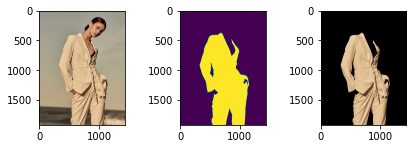

In [ ]:
workOnImage("/content/drive/MyDrive/img2.jpg",1,'./')

In [16]:
from PIL import Image

def convertImage(path_image,index, save_path):
    img = Image.open(path_image)
    #img = load_rgb(path_image)
    plt.figure(figsize=(20, 20))
    plt.subplot(3, 3, index)
    img = img.convert("RGBA")
    plt.imshow(img)

    datas = img.getdata()
    print(datas)
    newData = []
  
    for items in datas:
        print(items)
        if items[0] == 0 and items[1] == 0 and items[2] == 0:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(items)
  
    img.putdata(newData)
    img.save(save_path + '/img' + str(index+1) + ".png", "PNG")
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    

In [17]:
result_images = get_all_image(folder = "result/")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(58, 55, 60, 255)
(18, 16, 22, 255)
(12, 10, 16, 255)
(5, 3, 8, 255)
(8, 6, 12, 255)
(17, 15, 21, 255)
(12, 11, 17, 255)
(2, 0, 6, 255)
(12, 11, 17, 255)
(30, 27, 35, 255)
(57, 55, 60, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 

ValueError: ignored

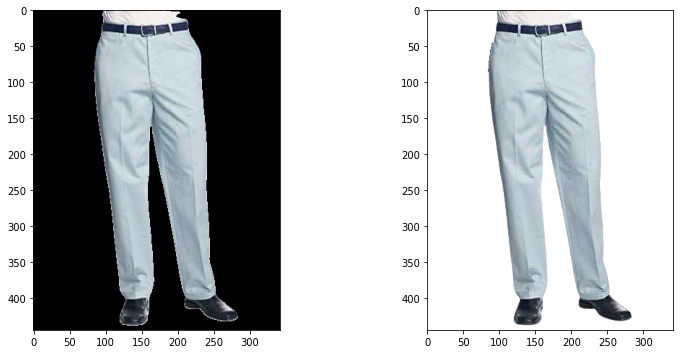

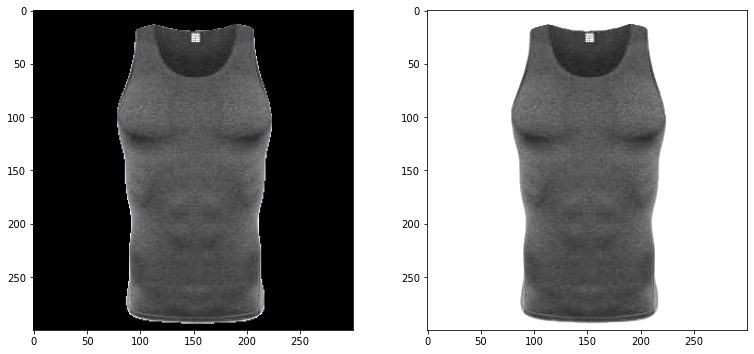

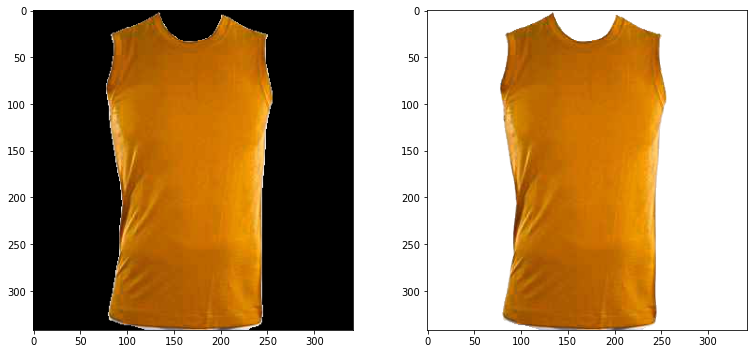

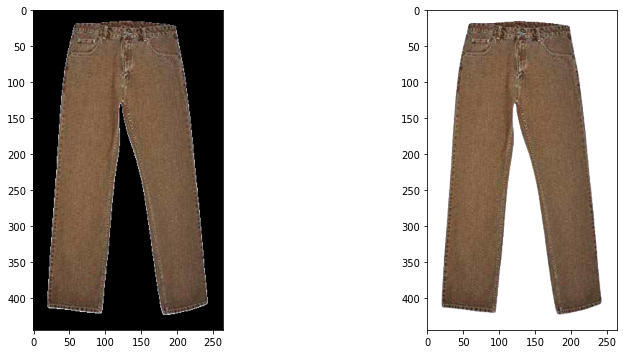

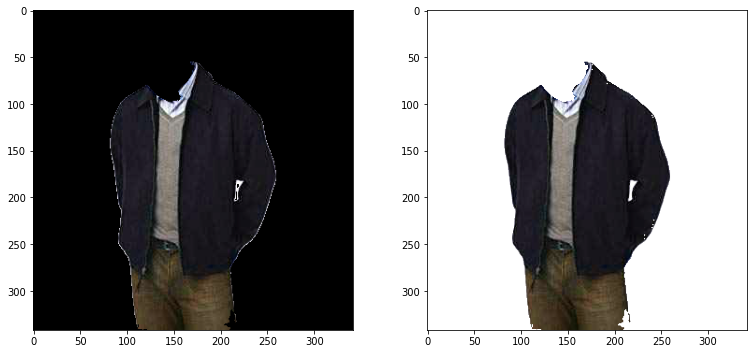

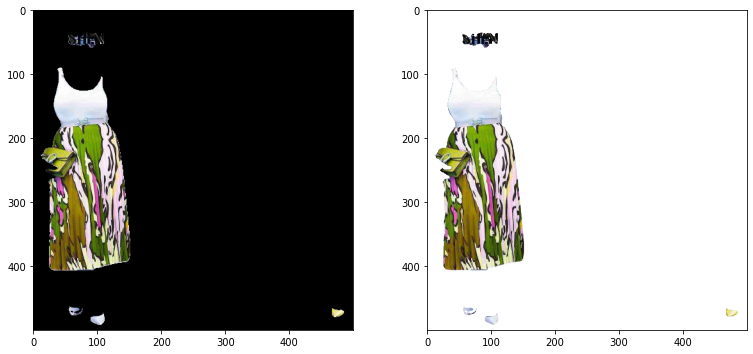

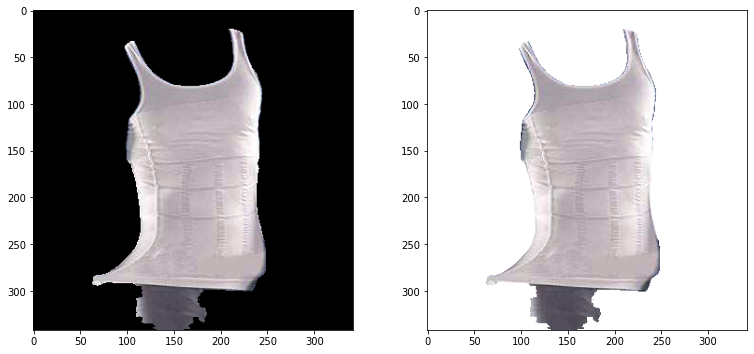

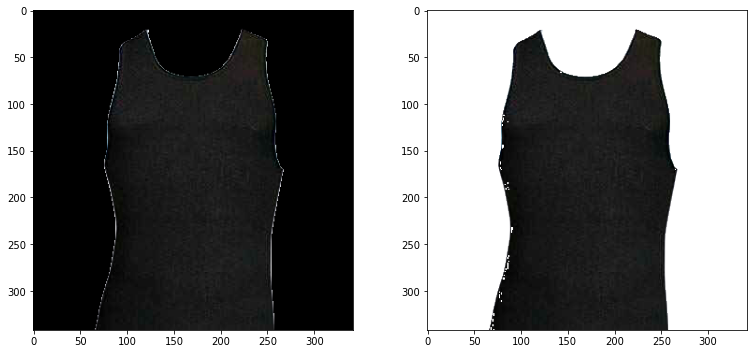

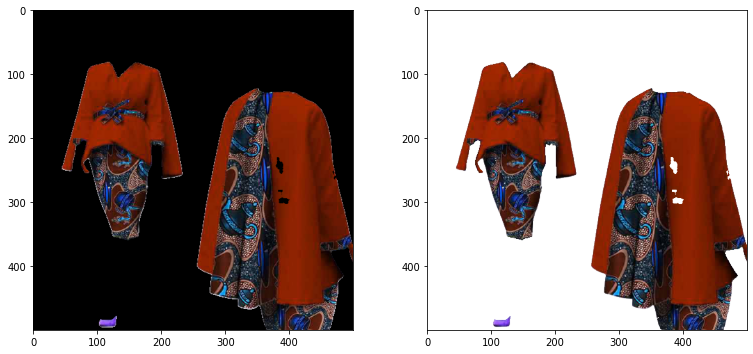

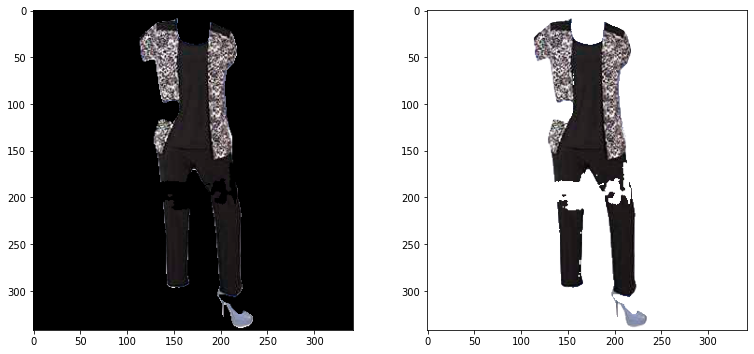

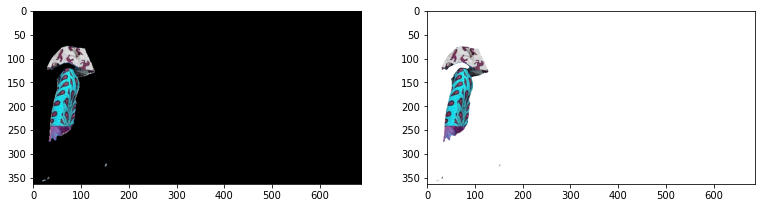

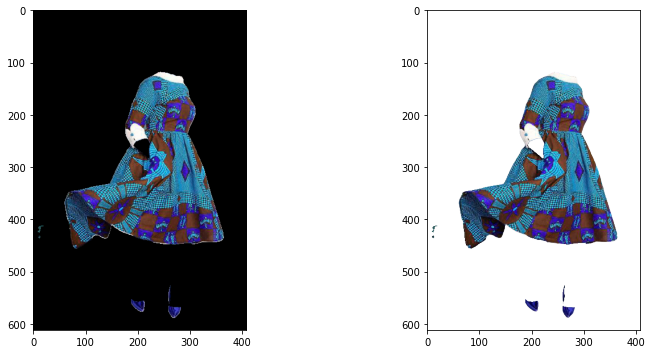

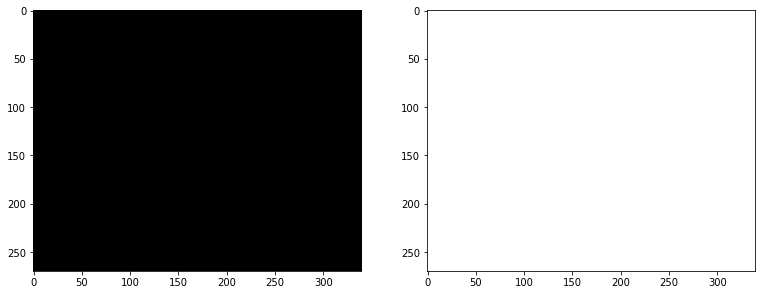

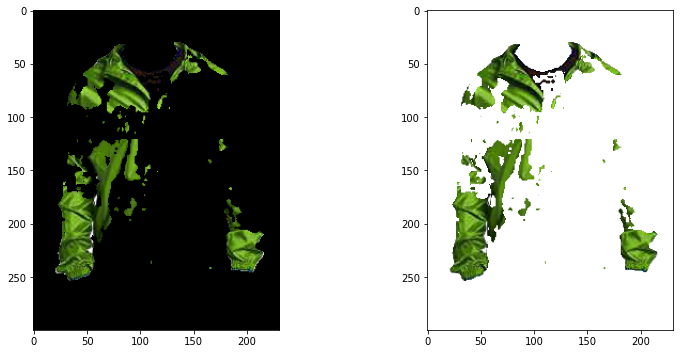

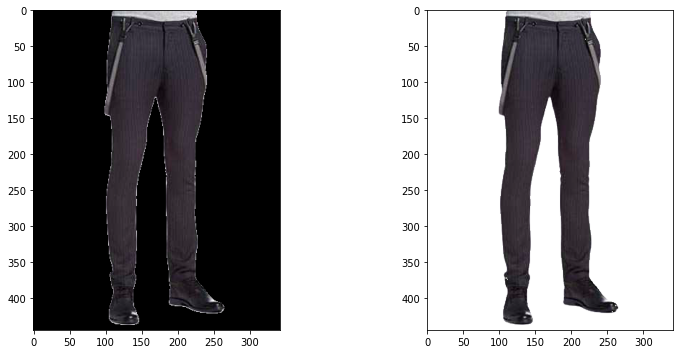

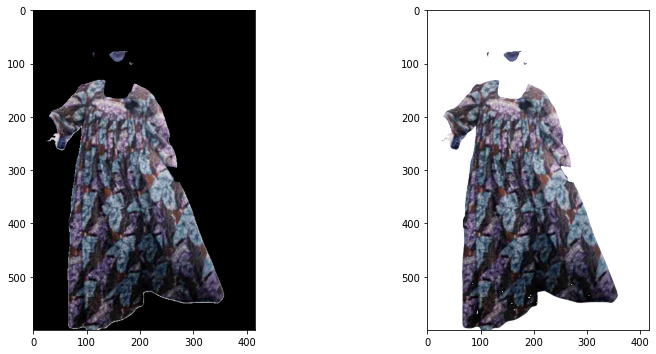

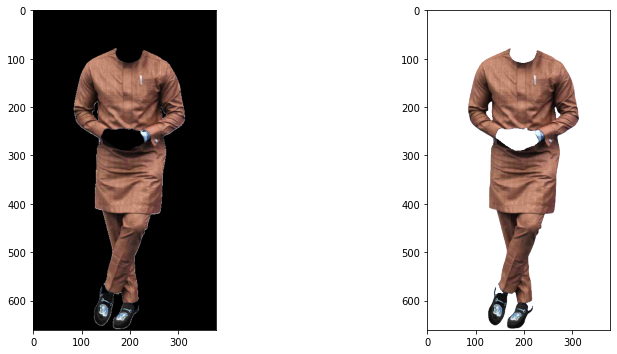

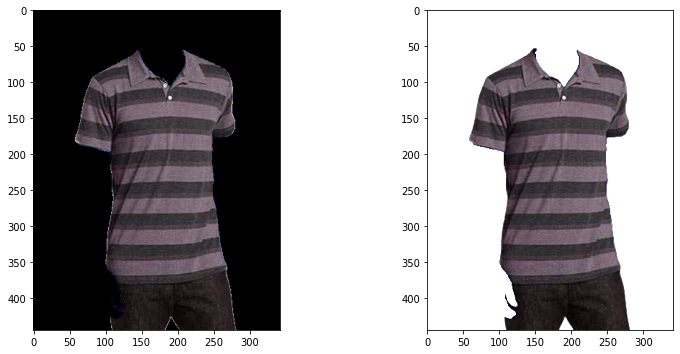

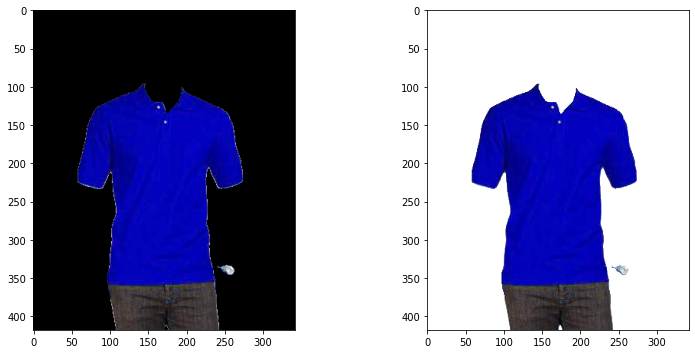

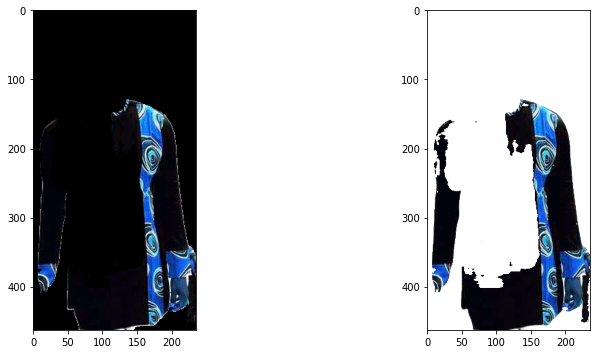

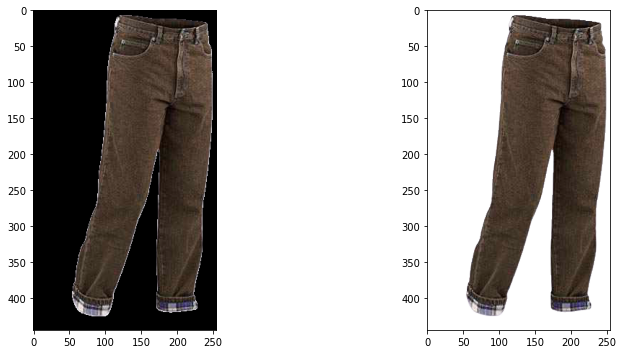

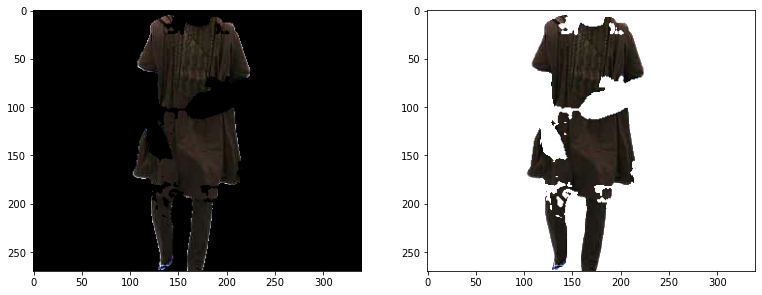

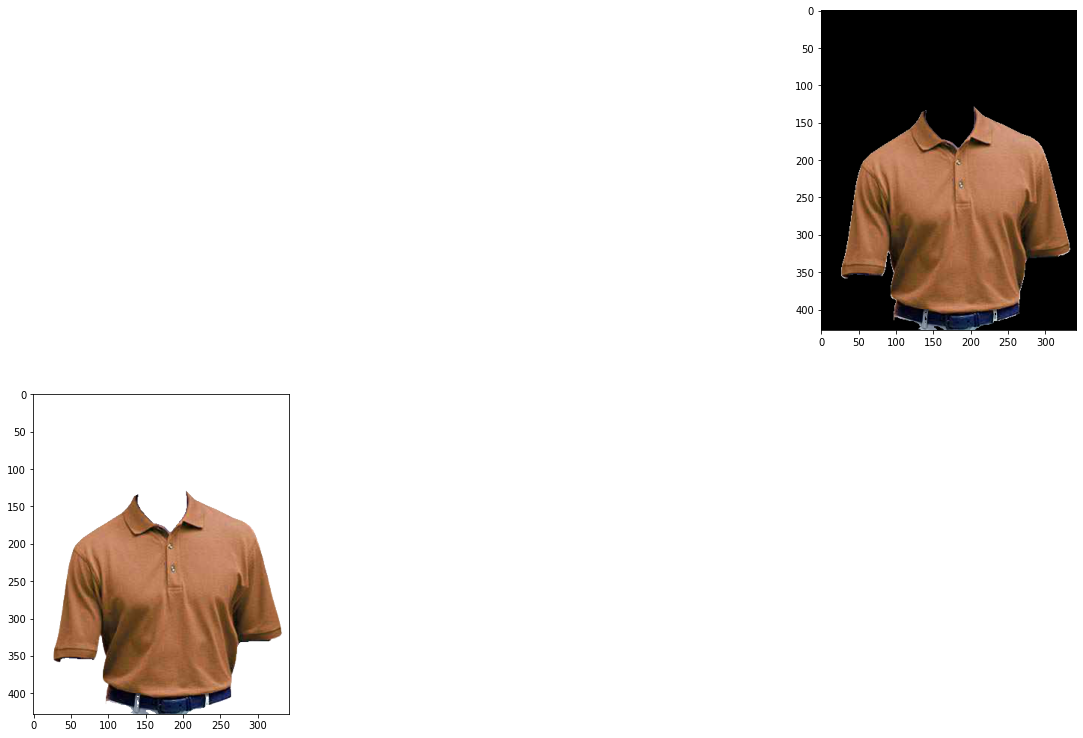

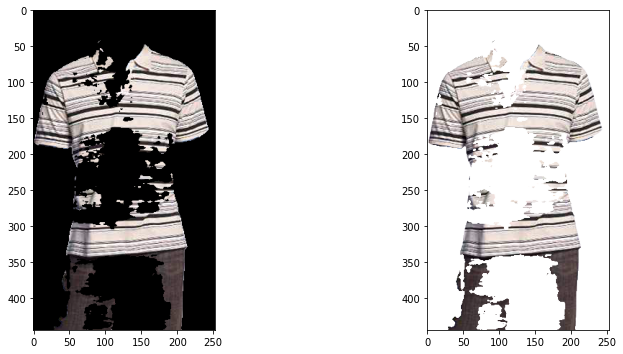

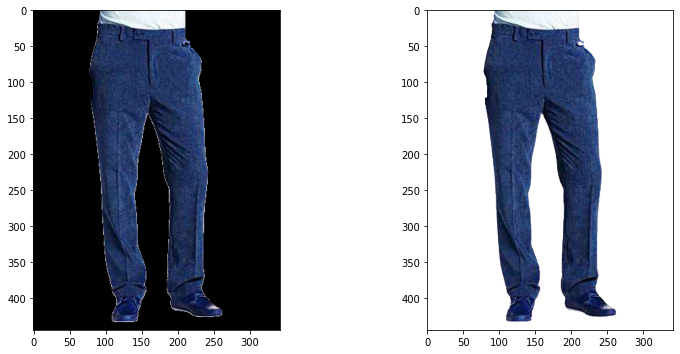

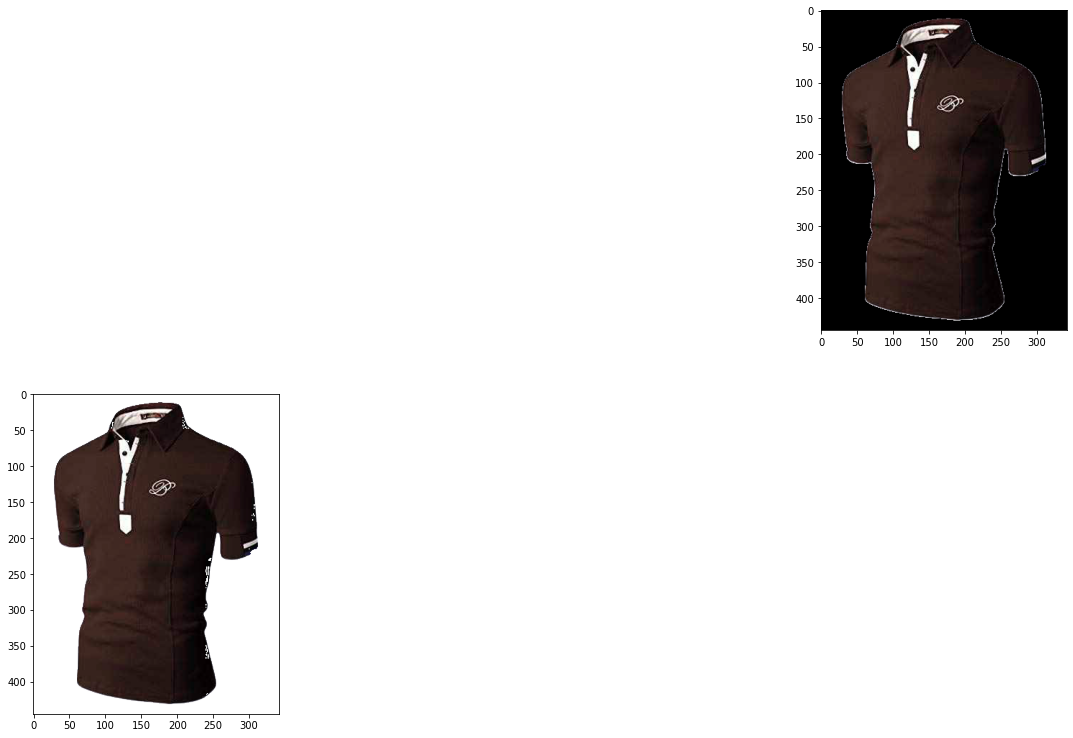

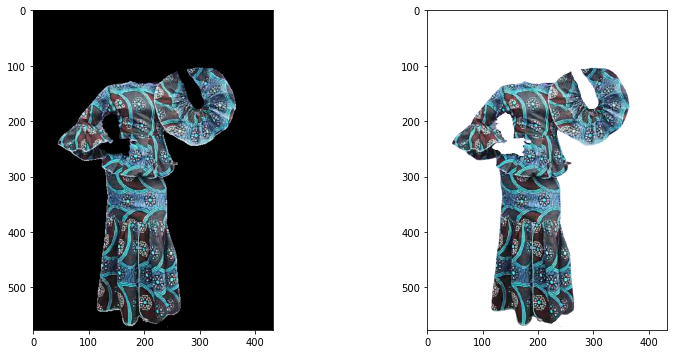

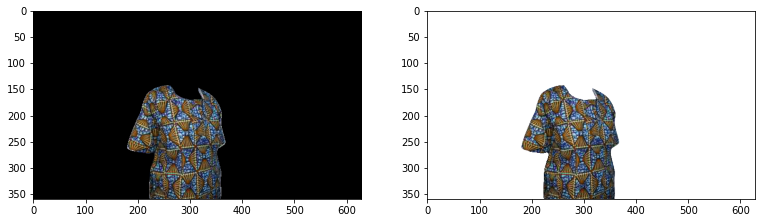

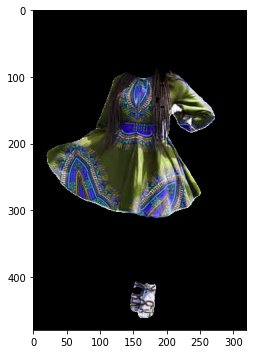

In [18]:
output_dir = "result_tranparent"
for i, image in enumerate(result_images):
  directory = "result" + str(i+1)
  directory = os.path.join(output_dir, directory)
  os.makedirs(directory, exist_ok=True)
  for j, im in enumerate(image):
    convertImage(im, j+1, directory)

In [19]:
!zip -r r1.zip /content/result_tranparent 

  adding: content/result_tranparent/ (stored 0%)
  adding: content/result_tranparent/result7/ (stored 0%)
  adding: content/result_tranparent/result7/img2.png (deflated 1%)
  adding: content/result_tranparent/result11/ (stored 0%)
  adding: content/result_tranparent/result11/img2.png (deflated 5%)
  adding: content/result_tranparent/result10/ (stored 0%)
  adding: content/result_tranparent/result10/img2.png (deflated 2%)
  adding: content/result_tranparent/result18/ (stored 0%)
  adding: content/result_tranparent/result18/img2.png (deflated 1%)
  adding: content/result_tranparent/result14/ (stored 0%)
  adding: content/result_tranparent/result14/img2.png (deflated 1%)
  adding: content/result_tranparent/result17/ (stored 0%)
  adding: content/result_tranparent/result17/img2.png (deflated 1%)
  adding: content/result_tranparent/result16/ (stored 0%)
  adding: content/result_tranparent/result16/img2.png (deflated 1%)
  adding: content/result_tranparent/result3/ (stored 0%)
  adding: cont

In [ ]:
#result_image[np.where((result_image==[0,0,0]).all(axis=2))] = [255,255,255]


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 0, 255)
(0, 0, 

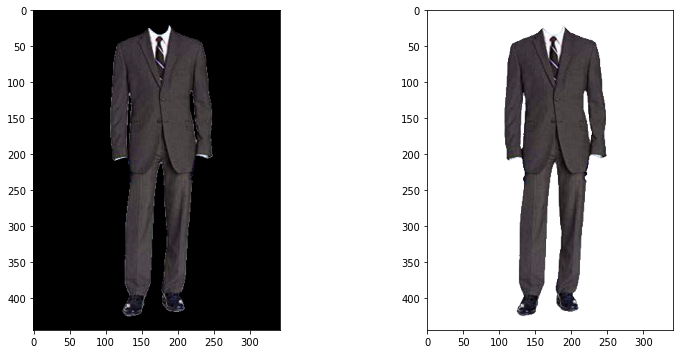

In [ ]:
convertImage('80.png', 1, './')

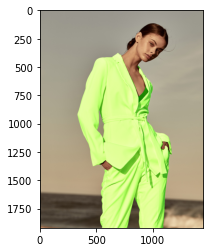

In [ ]:
imshow(dst)

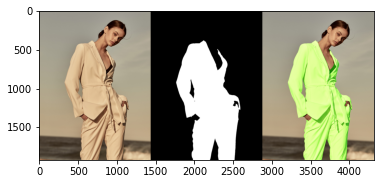

In [ ]:
imshow(np.hstack([image, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * 255, dst]))